**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

**Loading the dataset**

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Some analysis of the features**

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

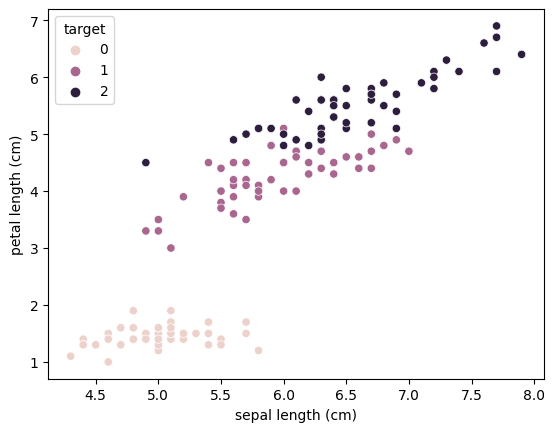

In [ ]:
sns.scatterplot(x='sepal length (cm)',y='petal length (cm)',hue='target',data=df)

<Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>

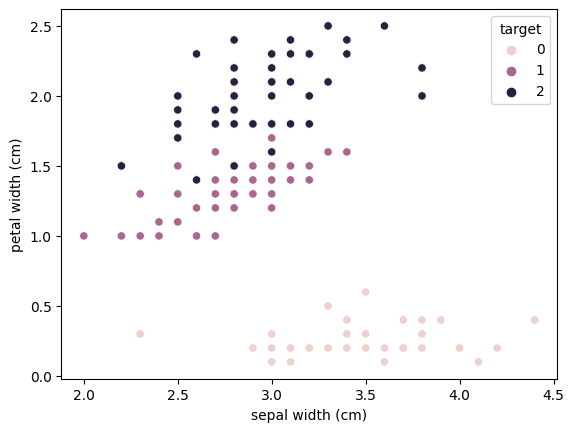

In [ ]:
sns.scatterplot(x='sepal width (cm)',y='petal width (cm)',hue='target',data=df)

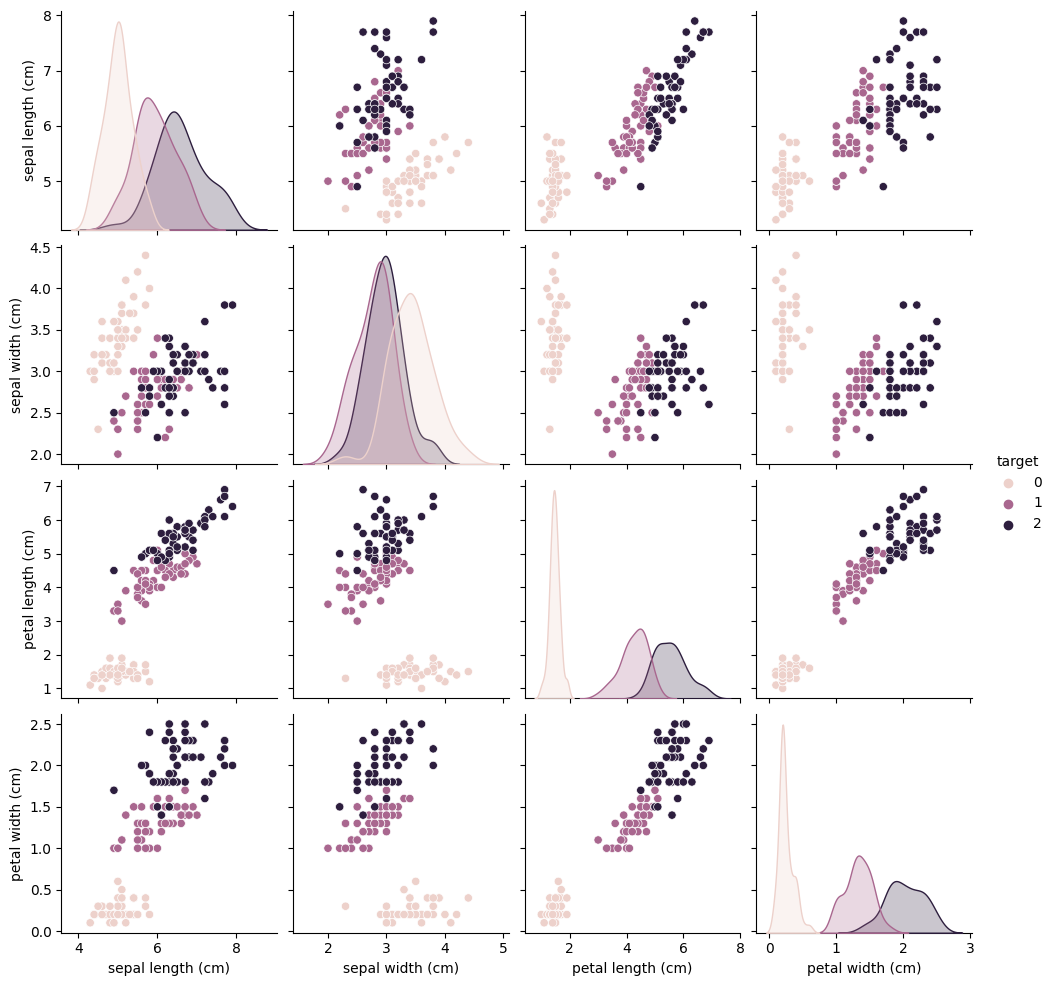

In [ ]:
sns.pairplot(data=df,hue='target')

**scaling of the features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])
scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)']=scaler.transform(df[['sepal width (cm)']])
scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)']=scaler.transform(df[['sepal length (cm)']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


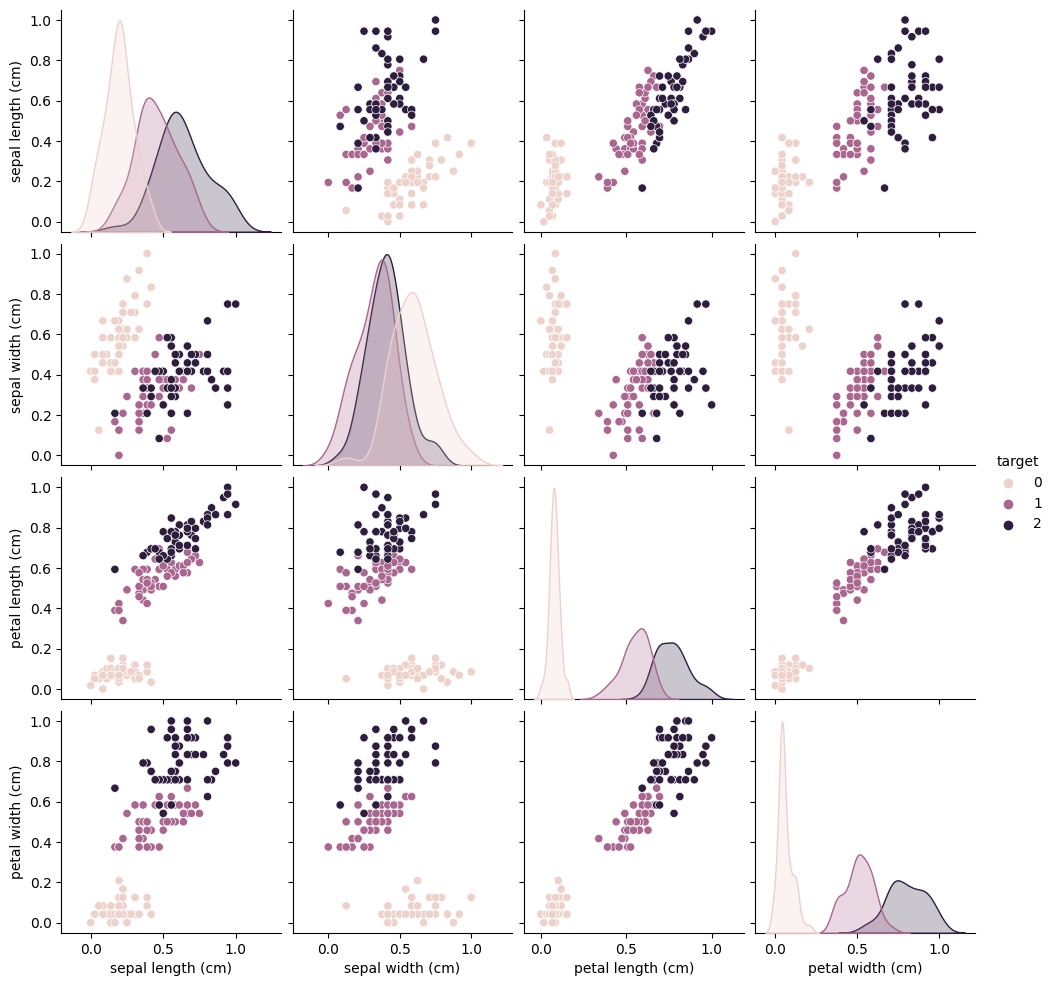

In [ ]:
sns.pairplot(data=df,hue='target')

In [ ]:
x=df.drop(['target'],axis=1)
y=df.target
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

**Building the machine learning model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
neigh.score(x_test,y_test)

1.0

In [ ]:
neigh.score(x_train,y_train)

0.9583333333333334

***looks like the model is not overfitted***

**confusion matrix**

<Axes: >

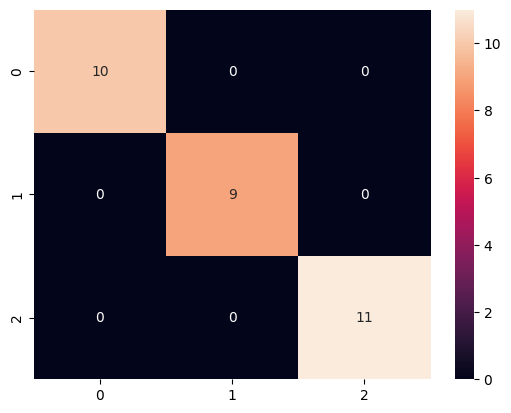

In [ ]:
y_pred=neigh.predict(x_test)
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True)

**cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
neighbors=[]
cv_scores=[]

for k in range(1,51,2):
  neighbors.append(k)
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
  cv_scores.append(scores.mean())

scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(scores)


[0.86666667 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.86666667 0.93333333 1.         0.93333333]


**misclassification error**

the optimal number of K is: 11


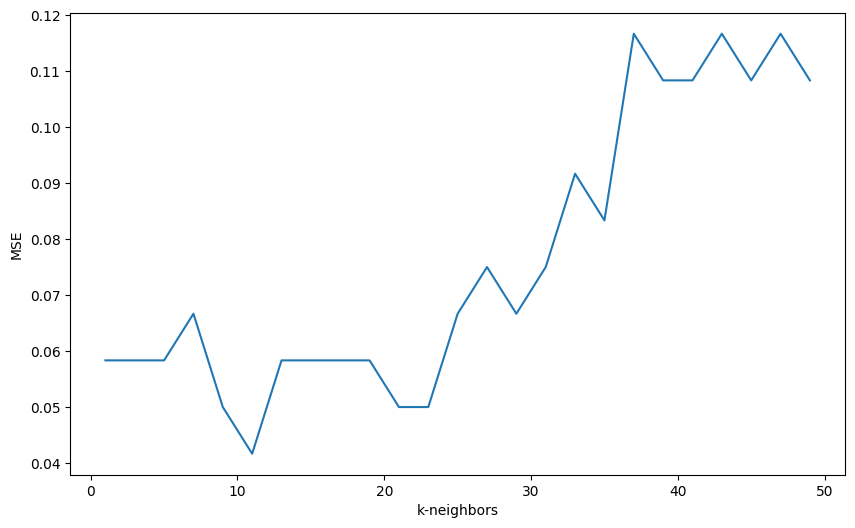

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

MSE=[1-x for x in cv_scores]

optimal_k=neighbors[MSE.index(min(MSE))]
print("the optimal number of K is:",int(optimal_k))

plt.figure(figsize=(10,6))
plt.plot(neighbors,MSE)
plt.xlabel('k-neighbors')
plt.ylabel('MSE')
plt.show()